# Kütüphaneleri İndirme

Bu kısımda kullanacağımız veri setlerini indirdiğimiz kısım.

In [1]:
!pip install librosa
!pip install opencv-python
!pip install -q keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Veri Setini İnceleme
Veri setimizi önceden bilgisayarımızı indirmiştik. İndirdiğim veri setini "zip" formatına çeviriyorum ve google drive'ıma yüklüyorum. Yüklediğim veri setini bu kısımda unzip ile "/content" yolunun içindeki oluşturduğum bir klasörün içerisine ayıklıyorum.

Tabi daha öncesinden drive'ınız ile colab entegre etmeyi unutumayın!

Eğer veri setini indirmek istiyor iseniz aşağıda bıraktığım linkten indirebilirsiniz.

Dataset: https://urbansounddataset.weebly.com/urbansound8k.html


In [2]:
!unzip "/content/drive/MyDrive/UrbanSound.zip" -d "/content/UrbanSound/" 

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-21.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-3.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-4.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-5.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-6.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-7.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-8.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/154758-5-0-9.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/155320-3-0-0.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/156362-4-0-0.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/156362-4-0-1.wav  
  inflating: /content/UrbanSound/UrbanSound8K/audio/fold4/156362-4-0-2.wav  
  inflating: /content/UrbanS

Bu kısımda kütüphanelerimi sisteme belirtiyorum.

In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.utils import to_categorical 

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

Pandas(pd) kütüphanem ile data setimi okuyorum ve içerisinindeki verilerimiz göz atıyoruz.

In [49]:
# Okuma kısmı
data = pd.read_csv("/content/UrbanSound/UrbanSound8K/metadata/UrbanSound8K.csv")
# Veri setimiz
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


".info" ile veri seti içerimizdeki verilerin kolonlarına, türlerine ve ne kadar veri içerdiğine bakıyoruz.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


Veri setimizin shape'ine bakıyorum. (8732, 8)'lik bir matristen oluşuyor.

In [6]:
print(data.shape)

(8732, 8)


Veri seti içerisindeki "classID" kolonun içerisinde olan değerler.

In [7]:
data["classID"].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4])

Veri setinin "classID" kolonun içerisindeki veriler neler olduğuna ve ne kadar olduklarını gösterdim.

In [8]:
data["classID"].value_counts()

3    1000
2    1000
0    1000
9    1000
5    1000
7    1000
4    1000
8     929
1     429
6     374
Name: classID, dtype: int64

Veri setinin "class" kolonun içerisindeki veriler neler olduğuna ve ne kadar olduklarını gösterdim.

In [9]:
data["class"].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

Veri setimizin içerisinde bulunan kolonlar.

In [10]:
data["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

Readme kısmının içerisinden aldığım bu kısım sayılar classID içerinde olan değerler, numaraların karşısındaki isimler ise sayılara denk gelen isimlerdir. Bu kısımda hangi numaranın hangi isme denk geldiğini gösterdim.

* classID:<br>
A numeric identifier of the sound class:<br>
0 = air_conditioner<br>
1 = car_horn<br>
2 = children_playing<br>
3 = dog_bark<br>
4 = drilling<br>
5 = engine_idling<br>
6 = gun_shot<br>
7 = jackhammer<br>
8 = siren<br>
9 = street_music

In [11]:
classes = data.groupby("classID")["class"].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

## Veri Setinin Görselleştirilmesi
Bu kısımda veri setimizin içerisindeki ses dosyalarını resim olarak ve daha sonra ses olarak sizlere göstereceğiz.

Veri setimin içerisinden rastgele seçtiğim bir ses dosyasını gri formatta görselleştirdim ve sesini daha soraki kodda belirttim.

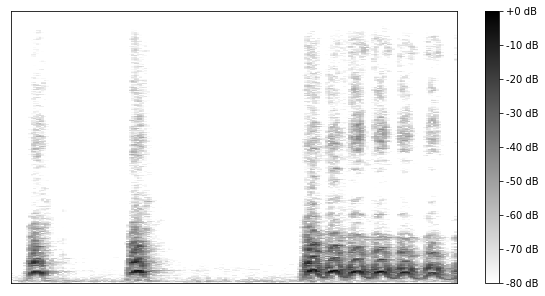

In [12]:
# Kütphanin belirtilmesi
import librosa.display
# ses dosyasının librosa kütüphanesi ile okunması
y, sr = librosa.load("/content/UrbanSound/UrbanSound8K/audio/fold1/101415-3-0-2.wav")

# Matplotlib ile ses dosyasının görselleştirme kısmı
plt.figure(figsize = (10,5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref = np.max)
img = librosa.display.specshow(D, cmap='gray_r')
plt.colorbar(img,format="%+2.f dB")

In [13]:
# Yukarıdaki ses dosyasının sesi!
ipd.Audio(y,rate=sr)

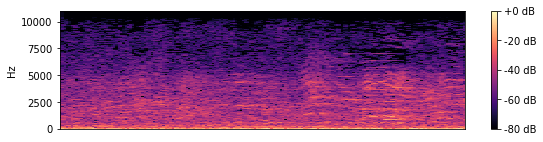

In [14]:
# ses dosyasının librosa kütüphanesi ile okunması
y, sr = librosa.load("/content/UrbanSound/UrbanSound8K/audio/fold5/100263-2-0-36.wav")

# Matplotlib ile ses dosyasının görselleştirme kısmı
plt.figure(figsize = (20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref = np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis = "linear")
plt.colorbar(format='%+2.0f dB')

In [15]:
# Yukarıdaki ses dosyasının sesi!
ipd.Audio(y,rate=sr)

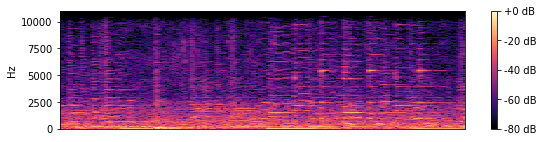

In [16]:
# ses dosyasının librosa kütüphanesi ile okunması
y, sr = librosa.load("/content/UrbanSound/UrbanSound8K/audio/fold7/101848-9-0-2.wav")

# Matplotlib ile ses dosyasının görselleştirme kısmı
plt.figure(figsize = (20,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref = np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis = "linear")
plt.colorbar(format='%+2.0f dB')

In [17]:
# Yukarıdaki ses dosyasının sesi!
ipd.Audio(y,rate=sr)

# Veri Setini Hazırlama
Bu kısımda veri setimizi CNN(Convolutional Neural Network) modelimizde eğitim yapmak için hazırlayacağız.

Bu kısımda spectrogram'ına ayırdığım ses dosyasının shape'ine baktım bunu yapma nedenim ilerine "128" sayısını kullanacağımdan ötürüdür.

In [19]:
# Ses dosyasının librosa kütüphanesi okunması
dat1, sampling_rate1 = librosa.load('/content/UrbanSound/UrbanSound8K/audio/fold1/101415-3-0-2.wav')
# Ses dosyasının liborsa ile spectrogram'ına ayırma işlemi
arr = librosa.feature.melspectrogram(y=dat1, sr=sampling_rate1)
# spectrogram'ına ayrılan ses dosyasının shape'i
arr.shape

(128, 173)

Veri setimizin içerisindeki ses dosyalarını spectrogram'ına ayıracağım foksiyonum. En son koddda numpy kütüphanesi ile oluşan spectrogram'ın ortalamasını alıp seksene böldüm. Bunu yapma sebebim veri setini düz spectrogram'ına ayırdığımızda bir ses dosyasının spectrogram'ı (128,1) formatına çevirmek ve seksene bölerekte normlizasyon işlemini yaptım.

In [20]:
def create_pectrogram(path):
  # Ses dosyasının librosa kütüphanesi okunması
  y, sr = librosa.load(path)

  #spec_conv = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T,axis=0) Bu kısım denemedir isterseniz aşağıdaki kodları uygulamak yerine direk bu kısmı uygulaya bilirsiniz!

  # Ses dosyasının liborsa ile spectrogram'ına ayırma işlemi
  spec = librosa.feature.melspectrogram(y=y)

  # Genlik spektrogramını dB ölçekli spektrograma dönüştürün.
  spec_conv = librosa.amplitude_to_db(spec, ref = np.max)
  
  spec_mean = np.mean((spec_conv / 80.0).T, axis = 0)
  return spec_mean

Bu kısımda veri setimizideki her ses doyasının spectrogram'larına dönüştürüyorum ve dönüştürüdüğüm ses dosyalarının classID'lerini alıyorum bir liste içerisine.

In [21]:
# Dosya içerisindeki ses dosyalarımızı sepctogramlarına ayırıyoruz ve classID'leri ile birleştiriyoruz.
# Listelerim
spectrogram = []
classid = []

# Ayırştırma işleminin olduğu kısım
for i in range(data.shape[0]):
  # Ses dosyasının yolunu saptıyorum
  file_name = "/content/UrbanSound/UrbanSound8K/audio/fold" + str(data["fold"][i]) + "/" + data["slice_file_name"][i]
  label = data["classID"][i]
  # Ses dosyasının spectrogram'ını hazırladığım fonksiyon ile alıyorum.
  spec_conv = create_pectrogram(file_name)

  # Listelerin içerisinde eklediğim kısım
  spectrogram.append(spec_conv)
  classid.append(label)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]


In [44]:
# Bir ses dosyaısının spectrogram'ı
spectrogram[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.9945931 , -1.        , -1.        , -0.9875754 , -0.95060235,
       -0.90932614, -0.8725766 , -0.86560875, -0.8446826 , -0.7606162 ,
       -0.6675405 , -0.7293027 , -0.73995113, -0.6767201 , -0.66990083,
       -0.6221319 , -0.580347  , -0.48567468, -0.56258595, -0.5761671 ,
       -0.5822102 , -0.6190691 , -0.6077043 , -0.52298886, -0.5010988 ,
       -0.58351773, -0.5604374 , -0.58665943, -0.659011  , -0.7400593 ,
       -0.72486836, -0.71874076, -0.77031296, -0.71917   , -0.66812927,
       -0.7146947 , -0.76412266, -0.7398225 , -0.6851777 , -0.6873688 ,
       -0.5442124 , -0.47844562, -0.4869544 , -0.4769695 , -0.64676774,
       -0.7012029 , -0.72751033, -0.7012562 , -0.74539816, -0.71847755,
       -0.7204046 , -0.7081627 , -0.6345361 , -0.66472626, -0.64

In [45]:
# Bir ses dosyasının classID'si
classid[0:10]

[3, 2, 2, 2, 2, 2, 2, 2, 2, 1]

Veri seti içerisindeki ses dosyalarının spectrogram'larını ve classID'lerini ayrı bi şekilde aldıktan sonra, aldığım bu verileri pandas kütüphanesi ile dataframe haline çeviriyorum.

In [46]:
# spectrogram ve classID'nin dictionary kısımı
new_data = {"goruntu" : spectrogram , "etiket" : classid}

# Bu kısımda dataframe aldığım kısım
new_data = pd.DataFrame(new_data)

new_data.head(10)

,goruntu,etiket
0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",3
1,"[-0.21843895, -0.21132365, -0.2393064, -0.2684...",2
2,"[-0.32181048, -0.322862, -0.29995838, -0.33569...",2
3,"[-0.427921, -0.39588195, -0.36898926, -0.39943...",2
4,"[-0.17266689, -0.20569813, -0.2736447, -0.3136...",2
5,"[-0.41863644, -0.31771144, -0.32708594, -0.447...",2
6,"[-0.1786074, -0.14631017, -0.21384995, -0.2486...",2
7,"[-0.3205523, -0.20981465, -0.18235303, -0.2900...",2
8,"[-0.36694485, -0.24316159, -0.23265296, -0.363...",2
9,"[-0.99772376, -0.97736675, -0.81941736, -0.682...",1


In [25]:
data.shape[0]

8732

Bu kısımda new_data array formatına çevirdik ve transpozunu aldım.

In [26]:
data_last = np.array(new_data)
data_last = data_last.transpose()

Bu kısımda X ve Y kısımlarını olşturudum.

In [27]:
X_ = data_last[0]
Y = data_last[1]
print(X_.shape)
print(Y.shape)

(8732,)
(8732,)


In [47]:
X_[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.9945931 , -1.        , -1.        , -0.9875754 , -0.95060235,
       -0.90932614, -0.8725766 , -0.86560875, -0.8446826 , -0.7606162 ,
       -0.6675405 , -0.7293027 , -0.73995113, -0.6767201 , -0.66990083,
       -0.6221319 , -0.580347  , -0.48567468, -0.56258595, -0.5761671 ,
       -0.5822102 , -0.6190691 , -0.6077043 , -0.52298886, -0.5010988 ,
       -0.58351773, -0.5604374 , -0.58665943, -0.659011  , -0.7400593 ,
       -0.72486836, -0.71874076, -0.77031296, -0.71917   , -0.66812927,
       -0.7146947 , -0.76412266, -0.7398225 , -0.6851777 , -0.6873688 ,
       -0.5442124 , -0.47844562, -0.4869544 , -0.4769695 , -0.64676774,
       -0.7012029 , -0.72751033, -0.7012562 , -0.74539816, -0.71847755,
       -0.7204046 , -0.7081627 , -0.6345361 , -0.66472626, -0.64

In [29]:
# X dosyasının shape'ini değiştiriyorum.
X = np.empty([data.shape[0], 128])
for i in range(data.shape[0]):
  X[i] = (X_[i])

In [30]:
# Y dosyasının shape'ini değiştiriyorum.
Y = to_categorical(Y)

In [31]:
print(X.shape)
print(Y.shape)

(8732, 128)
(8732, 10)


Bu kısımda oluşturduğum X ve Y verilerini kullanarak train ve test olarak ayırıyorum.

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6549, 128)
(2183, 128)
(6549, 10)
(2183, 10)


CNN modelimizin için shape'lerini son olarak ayarlıyorum.

In [34]:
X_train = X_train.reshape(X_train.shape[0], 16, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 16, 8, 1)

# CNN(Convolutional Neural Network)
Bu bölümde modelimizi Keras kütüphanimiz ile oluşturacağız. Modelimizi oluşturduktan sonra hazırladığımız veri seti ile eğitim gerçekleştiriyoruz. Son olarakta eğitim sonuçlarını görselleştireceğiz.

## Model Hazırlanaması
Bu kısımda CNN modelimizi oluşturuyoruz.

In [35]:
Model = Sequential()

Model.add(Conv2D(32, (3,3), padding = "same", activation = "relu", input_shape = (16, 8, 1)))
Model.add(MaxPool2D(pool_size=(2, 2)))

Model.add(Conv2D(64, (3,3), padding = "same", activation = "relu",))
Model.add(MaxPool2D(pool_size=(2, 2)))

Model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
Model.add(MaxPool2D(pool_size=(2, 2)))

Model.add(Conv2D(256, (3, 3), padding = "same", activation = "relu"))
Model.add(Dropout(0.1))
Model.add(Flatten())
Model.add(Dense(1024, activation = "tanh"))
Model.add(Dense(10, activation = "softmax"))

Model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
# Hazırladığımız modelin gösterimi

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 32)         320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 1, 128)        0

# Model Ile Eğitim
Bu kısımda modelimiz ve hazırladığımız veri seti ile eğitim gerçekleştireceğiz.

In [37]:
Epoch = 300
batch_size = 250

hist =  Model.fit(X_train, Y_train, epochs = Epoch, batch_size = batch_size, validation_data = (X_test, Y_test))

Epoch 1/300
27/27 [==============================] - 10s 23ms/step - loss: 2.2045 - accuracy: 0.1777 - val_loss: 2.0212 - val_accuracy: 0.2364
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 1.8460 - accuracy: 0.3087 - val_loss: 1.7664 - val_accuracy: 0.3372
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 1.7090 - accuracy: 0.3668 - val_loss: 1.6881 - val_accuracy: 0.3642
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 1.5312 - accuracy: 0.4257 - val_loss: 1.5438 - val_accuracy: 0.4572
Epoch 5/300
27/27 [==============================] - 0s 8ms/step - loss: 1.4036 - accuracy: 0.4868 - val_loss: 1.3509 - val_accuracy: 0.4975
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 1.3381 - accuracy: 0.5172 - val_loss: 1.3123 - val_accuracy: 0.5144
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 1.2446 - accuracy: 0.5497 - val_loss: 1.2042 - val_accuracy: 0.5589
Epoch 8/300

# Sonuçlar ve Görselleştirme
Eğitim sonuçlarımızı görelleştireğiz.

Bu kısımda loss ve Accuracy değerlerimi matplotlib kütüphanesi ile görselleştireceğim.


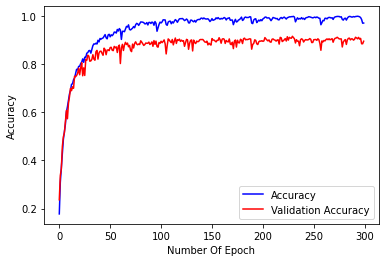

In [39]:
# Accuracy ve Validation Accuracy
plt.plot(range(Epoch), hist.history["accuracy"], color = "blue" , label = "Accuracy")
plt.plot(range(Epoch), hist.history["val_accuracy"], color = "red",  label = "Validation Accuracy")

plt.xlabel("Number Of Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

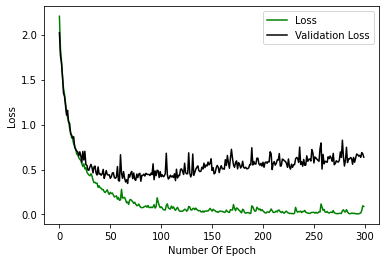

In [40]:
# Loss ve Validation Loss
plt.plot(range(Epoch), hist.history["loss"], color = "green" , label = "Loss")
plt.plot(range(Epoch), hist.history["val_loss"], color = "black",  label = "Validation Loss")
plt.xlabel("Number Of Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Model ile Tahmin
Eğittiğimiz model ile x_test verilerini kullanarak bir tahmin yapacağız.

In [41]:
# Tahmin etme işlemleri ve sonuçlarım
predictions = Model.predict(X_test)
score = Model.evaluate(X_test, Y_test)
print("Loss : {} Accuracy: {} ".format(score[0], score[1]))

69/69 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.8942
Loss : 0.6375991106033325 Accuracy: 0.8941823244094849 


In [42]:
# Tahmin değerlerim
preds = np.argmax(predictions, axis = 1)
preds

array([2, 8, 8, ..., 2, 4, 3])

In [48]:
# Tahmin değerlerimin Dataframe ile gösterimi
result = pd.DataFrame(preds)
result.head(10)

,0
0,2
1,8
2,8
3,5
4,7
5,8
6,3
7,2
8,8
9,0
